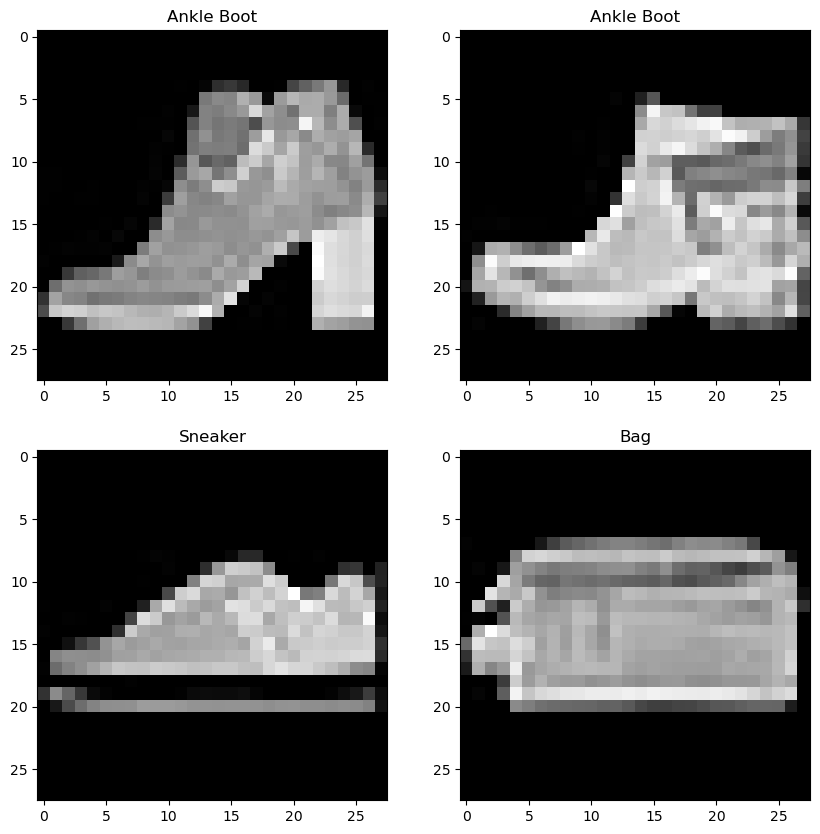

In [1]:
import torch
from torch.utils.data import Dataset # need to work with custom datasets
from torch.utils.data import DataLoader
from torchvision import datasets # import premade datasets
from torchvision.transforms import ToTensor, Lambda # will use to convert data to tensors
import matplotlib.pyplot as plt # will use to visualize dataset


#import training data
training_data = datasets.FashionMNIST(
    root = "/blue/aiinmedicine/jpatel6/FMNIST-Classifier", #this is the path to directory where data will be stored (is my directory on hipergator)
    train = True,  #this will be the training dataset
    download = True,  #need to download dataset from 'net
    transform = ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter(0,torch.tensor(y), value = 1))
)

#import testing data
test_data = datasets.FashionMNIST(
    root = "/blue/aiinmedicine/jpatel6/FMNIST-Classifier", #path to my directory in hipergator
    train = False, #this is not the training dataset
    download = True, #need to download dataset from the 'net
    transform = ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter(0,torch.tensor(y), value = 1))
)

#Here the numerical label tensor is being assigned to a string
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

#Data_Visualization
figure = plt.figure(figsize = (10,10)) #here i am creating a plt figure (10 inch by 10 inch) to visualize the data 
columns, rows = (2,2) #here i am saying i want a grid showing 4 images 

for i in range(1,(columns*rows+1)):3
    rand_index = torch.randint(len(training_data), size = (1,)).item() #here i am creating a 1D tensor holding a random number to represent the index i will extract from training images
    image, label = training_data[rand_index]
    figure.add_subplot(rows, columns, i) #here i am adding a subplot to the main FIGURE with our training images
    plt.title(labels_map[torch.nonzero(label).squeeze().item()]) #here i am taking the numerical label and converting into string using "labels_map" above
    plt.axis = ("off") #here i am getting rid of axis labels coz we dont need those when looking at images
    plt.imshow(image.squeeze(), cmap = 'grey') #do not have color channel, so squeeze 3D tensor to only 2D array
plt.show()

#DataLoaders
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True) #return data in batches that are randomly shuffled for training
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)